### Cardio Good Fitness Case Study

The Cardio Good Fitness Company sells Treadmills. It has three Products TM195, TM498 and TM798. Company is looking to increase sales and would like to find out which products it should focus on to increase sales. It has provided dataset of 180 of its customers for us to analyse this data and come up with profiles of the customers who use each of the three products.

### Datasets Information:

**CardioGoodFitness.csv:** It contains information on customers of the three products. Columns: Product, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income, Miles

### Objective:

To extract Customer Profiles and generate insights & recommendations that will help the company in targeting new customers  
### Learning Outcomes:
`Use of Uni-Variate Analysis, Multi-Variate Analysis`



### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot


In [ ]:
#import libraries 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Read in the dataset & check the first few rows

In [ ]:
#Load Case Data File Cardio Fitness Data file (CSV)
cfdata = pd.read_csv("CardioGoodFitness.csv")
cfdata

#### Observations
Product has the product names,
Usage contains how many times machine is used in a week,
Fitness contains self rated level,
Miles is how many miles ran/walk by the customer,
Total rows 180 and 9 Columns 

In [5]:
#Check If data is loaded 
#shows the top 10 rows from the dataset
cfdata+pd.DataFrame(cfdata.count())
#pd.DataFrame(cfdata.count())

,0,Age,Education,Fitness,Gender,Income,MaritalStatus,Miles,Product,Usage
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
Income,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MaritalStatus,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Miles,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Product,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Check for missing data 

In [6]:
#Check if any data is missing 
cfdata.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

#### There are no missing values in the dataset 


In [5]:
#lets check the shape of the Data
cfdata.shape

(180, 9)

#### There are 180 rows and 9 columns  in the dataset 


In [6]:
#Our Data has 180 Rows (Customers) with nine columns (Attributes)
#Now lets see what datatypes are there 
cfdata.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Convert Objects datatypes to Category

In [49]:
#Convert Product, Gender and MaritalStatus in Categorical Values 
cfdata['Product'] = cfdata.Product.astype('category')
cfdata['Gender'] = cfdata.Gender.astype('category')
cfdata['MaritalStatus'] = cfdata.MaritalStatus.astype('category')


In [28]:
#Lets get a statistical summary 
#cfdata.dtypes
cfdata.describe(include='all')


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00000,180,180.00000,180,180.00000,180.00000,180.00000,180.00000
unique,3,nan,2,nan,2,nan,nan,nan,nan
top,TM195,nan,Male,nan,Partnered,nan,nan,nan,nan
freq,80,nan,104,nan,107,nan,nan,nan,nan
mean,NaN,28.78889,NaN,15.57222,NaN,3.45556,3.31111,53719.57778,103.19444
std,NaN,6.94350,NaN,1.61705,NaN,1.08480,0.95887,16506.68423,51.86360
min,NaN,18.00000,NaN,12.00000,NaN,2.00000,1.00000,29562.00000,21.00000
25%,NaN,24.00000,NaN,14.00000,NaN,3.00000,3.00000,44058.75000,66.00000
50%,NaN,26.00000,NaN,16.00000,NaN,3.00000,3.00000,50596.50000,94.00000
75%,NaN,33.00000,NaN,16.00000,NaN,4.00000,4.00000,58668.00000,114.75000


### 5 Point Summary of the data 


In [10]:
#Five point summary of the data
cfdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.00000,28.78889,6.94350,18.00000,24.00000,26.00000,33.00000,50.00000
Education,180.00000,15.57222,1.61705,12.00000,14.00000,16.00000,16.00000,21.00000
Usage,180.00000,3.45556,1.08480,2.00000,3.00000,3.00000,4.00000,7.00000
Fitness,180.00000,3.31111,0.95887,1.00000,3.00000,3.00000,4.00000,5.00000
Income,180.00000,53719.57778,16506.68423,29562.00000,44058.75000,50596.50000,58668.00000,104581.00000
Miles,180.00000,103.19444,51.86360,21.00000,66.00000,94.00000,114.75000,360.00000


### Info about the Data

In [11]:
#Info about the data
cfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


###  Get the Unique Values 

In [20]:
#---------------------------------------------------------------------------------------------------
# Get the Unique Values 
#---------------------------------------------------------------------------------------------------
#cfdata['Gender'].value_counts()
#cfdata['Product'].value_counts()
cfdata['MaritalStatus'].value_counts()
# value count for each of the column


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### Get Central Tendency Measures 

In [17]:
# print mean income by Product 
#print("cfdata Mean:",cfdata.mean())
#cfdata.mean(axis=0)
# this is an example df.groupby(['data', 'category'])['passing_site', 'testTime'].mean()
# Group by on Product and Gender and find mean income 
# pcount = cfdata.groupby(['Product','Gender'])['Income'].mean()
# Total Sold , Males, Females, Singles, Partnered, Avg Usage, Avg Miles , Avg Fitness Rating, Avg Income , Income Median for each Product 
pcount = cfdata.groupby(['Product'])['Age'].mean()
pcount.head(15)

Product
TM195   28.55000
TM498   28.90000
TM798   29.10000
Name: Age, dtype: float64

In [14]:
#Mean Income by Product 
pcount = cfdata.groupby(['Product'])['Income'].median()
pcount.head(15)

Product
TM195   46617.00000
TM498   49459.50000
TM798   76568.50000
Name: Income, dtype: float64

In [35]:
#Mean Income by Product - Usage
pcount = cfdata.groupby(['Product','MaritalStatus'])['Income'].mean()
pcount.head(15)

Product  MaritalStatus
TM195    Partnered       47848.75000
         Single          44271.93750
TM498    Partnered       49522.66667
         Single          48150.12500
TM798    Partnered       82047.17391
         Single          66504.58824
Name: Income, dtype: float64

### See data in Pivot Table format

In [20]:
#Lets view data as a Pivot Table 
pd.pivot_table(cfdata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [11]:
#Lets view data as a Pivot Table - Marital Status 
pd.pivot_table(cfdata, index=['Product'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Gender  \
MaritalStatus Partnered Single Partnered Single Partnered Single Partnered   
Product                                                                      
TM195                48     32        48     32        48     32        48   
TM498                36     24        36     24        36     24        36   
TM798                23     17        23     17        23     17        23   

                        Income            Miles            Usage         
MaritalStatus Single Partnered Single Partnered Single Partnered Single  
Product                                                                  
TM195             32        48     32        48     32        48     32  
TM498             24        36     24        36     24        36     24  
TM798             17        23     17        23     17        23     17

### Get the Counts 

In [24]:
# Get the Counts by Category Variables 
#pcount = cfdata.groupby(['Product'])['Gendepcount = cfdata.groupby(['Product','Gender','MaritalStatus'])['Income'].count().reset_index().sum()
pcount = cfdata.groupby(['Product','Gender','MaritalStatus'])['Income'].count().reset_index()
#---------------------------------------------------------------------------------------------------
# following shows total count of rows 
#---------------------------------------------------------------------------------------------------
#pcount = cfdata.groupby(['Product','Gender','MaritalStatus'])['Income'].count().reset_index().sum()
#---------------------------------------------------------------------------------------------------
# lets Group by Gender 
#---------------------------------------------------------------------------------------------------
#pcount = cfdata.groupby(['Product','Gender'])['Income'].count().reset_index()
#pcount.head(15)
# to show the total instance count at the bottom 
pcount['Income'].sum()
#pcount.loc[len(pcount)] = [pcount['Income'].sum(),pcount['Income'].sum(),pcount['Income'].sum()]#
pcount

,Product,Gender,MaritalStatus,Income
0,TM195,Female,Partnered,27
1,TM195,Female,Single,13
2,TM195,Male,Partnered,21
3,TM195,Male,Single,19
4,TM498,Female,Partnered,15
5,TM498,Female,Single,14
6,TM498,Male,Partnered,21
7,TM498,Male,Single,10
8,TM798,Female,Partnered,4
9,TM798,Female,Single,3


## EDA
### Explore the numerical variables first:  Age, Education Annual Income , Mean number of times customer plans to use Treadmill per week and mean number of Miles the customer expects to run/walk

In [34]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

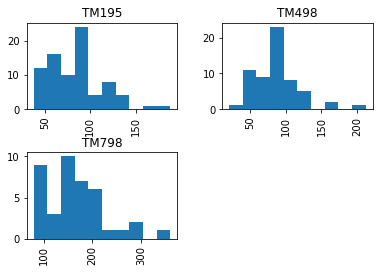

In [35]:
cfdata.hist(by='Product', column = 'Miles')

####  Miles - TM195 25-147, TM498 47-128 TM798 50-300


array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

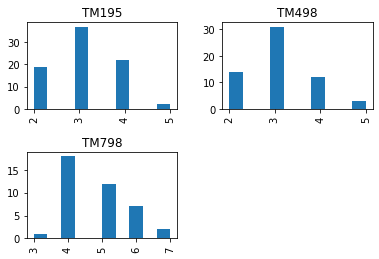

In [36]:
cfdata.hist(by='Product', column = 'Usage')

#### Usage -  TM798 has higher Usage than TM195 and TM498, TM195 has the least Usage

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

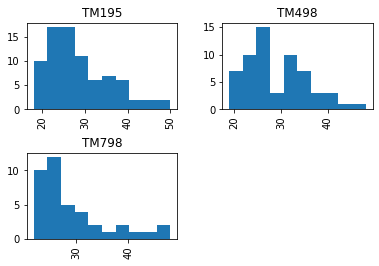

In [62]:
cfdata.hist(by='Product', column = 'Age') 

### Age 

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

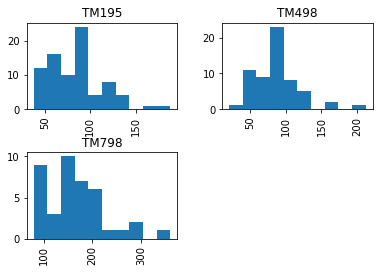

In [63]:
cfdata.hist(by='Product', column = 'Miles') 

### Miles

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

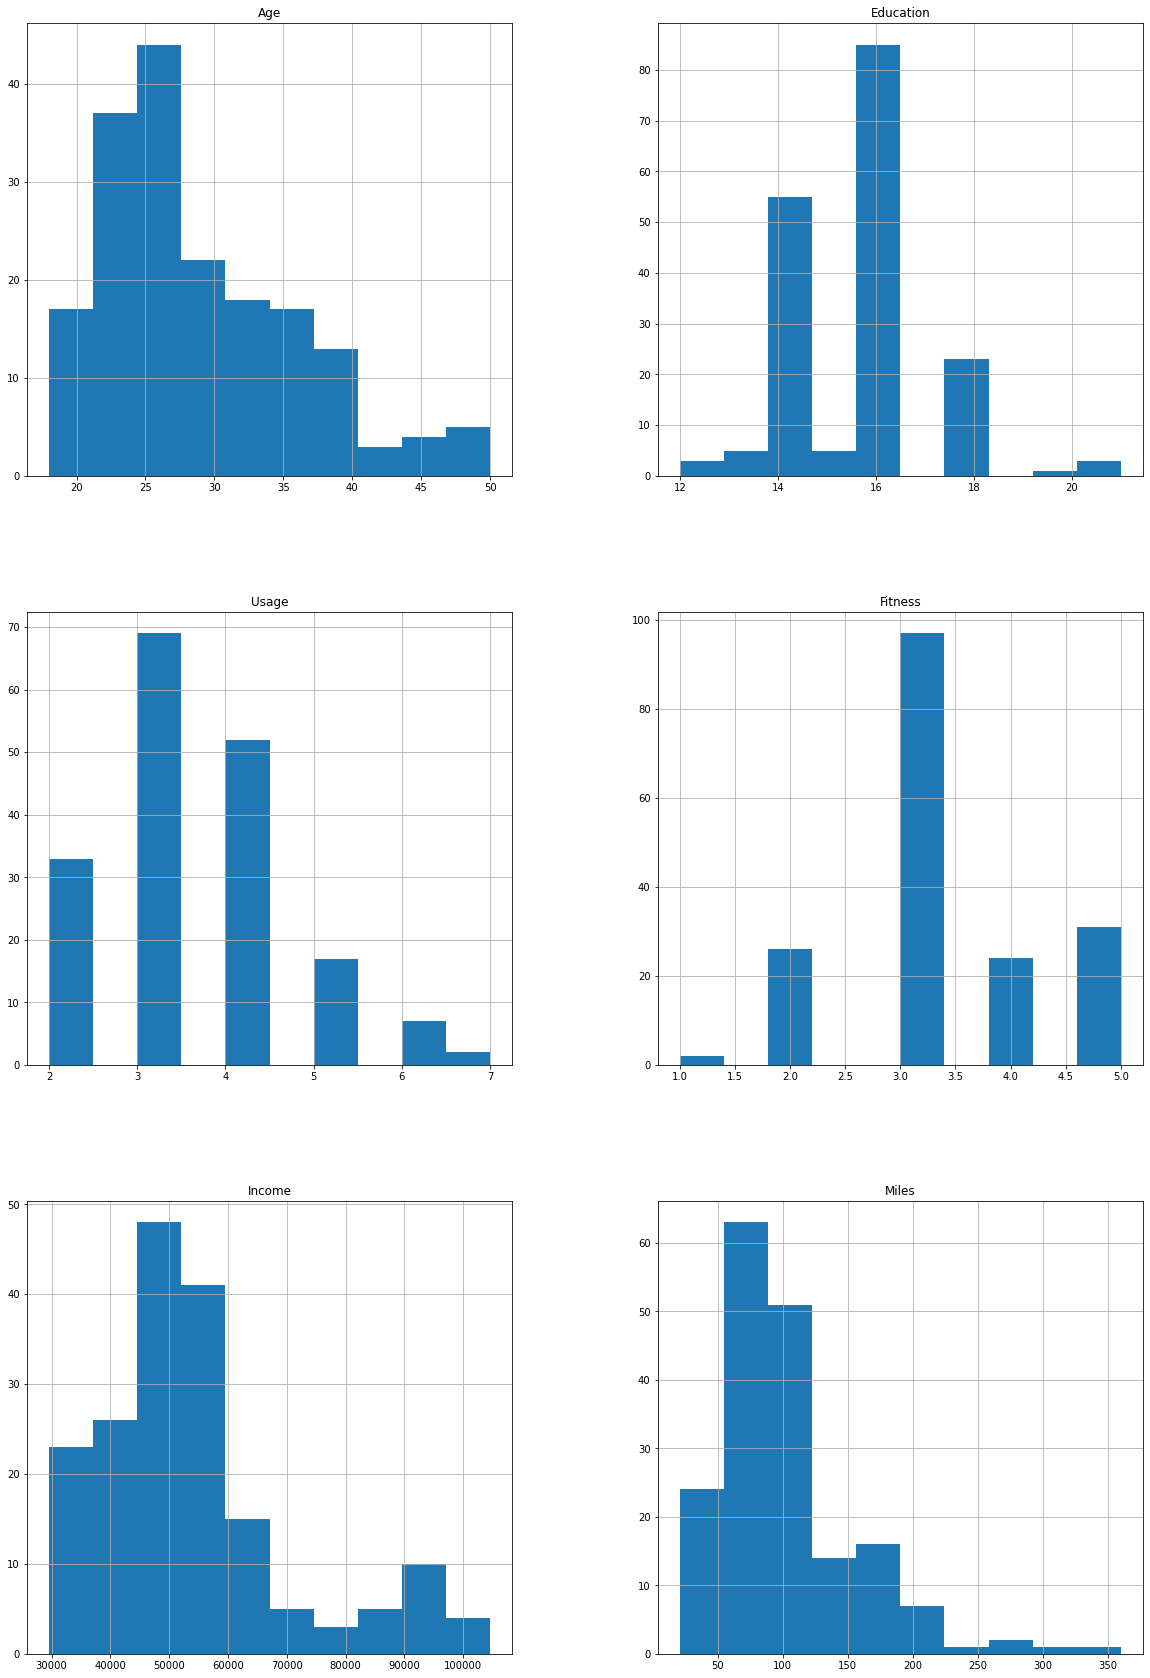

In [7]:
cfdata.hist(figsize=(20,30))

### Different attributes of Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

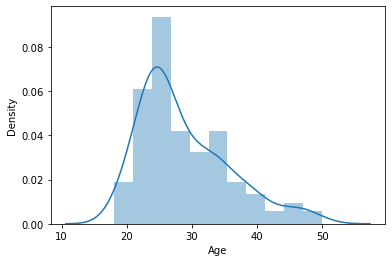

In [21]:
sns.distplot(cfdata['Age'])

### Distribution Plot - Age

<AxesSubplot:xlabel='Gender', ylabel='Age'>

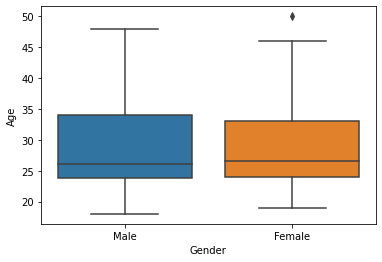

In [16]:
sns.boxplot(x="Gender", y="Age", data=cfdata)

### BoxPlot - Gender and Age 

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

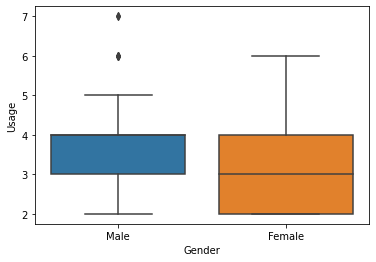

In [19]:
sns.boxplot(x="Gender", y="Usage", data=cfdata)

### BoxPlot Gender & Usage 

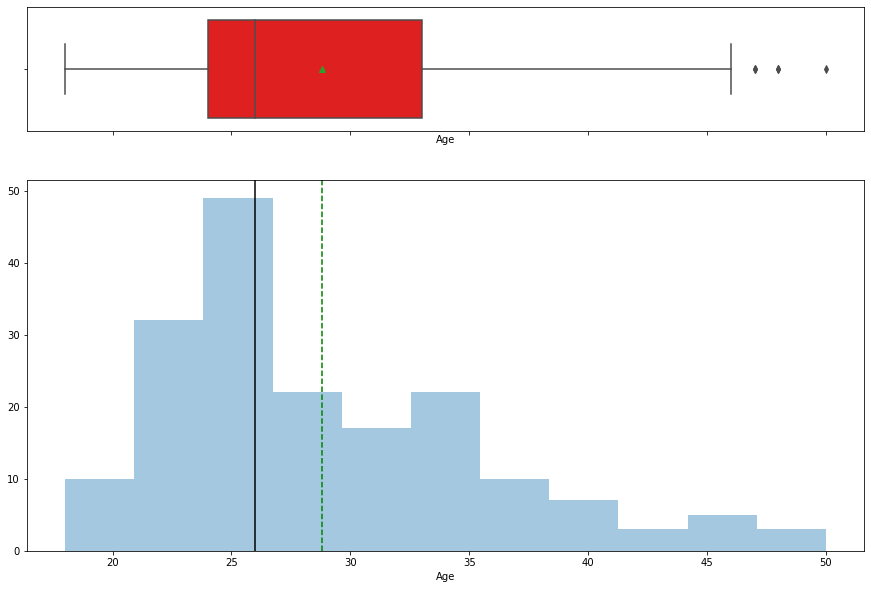

In [36]:
histogram_boxplot(cfdata.Age)

### Observations - Age of Customers 
#### The Mean age of Customers 28.78
#### Age is skewed to the right of mean. Majority of the customers are older than 28 years
#### There are a few outliers in this variable.
#### While most of the customers are aged 25-40, observing this data we can see customers as high age  as 50

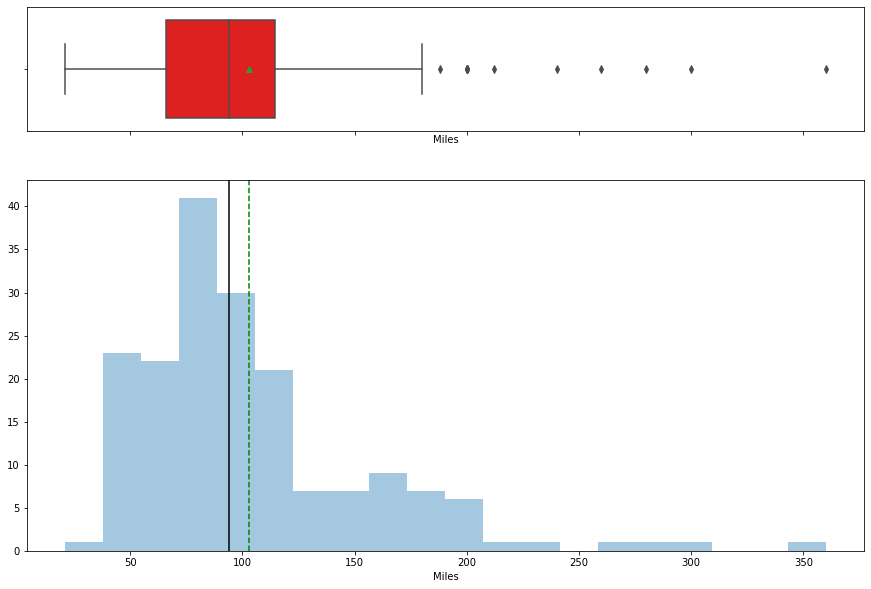

In [40]:
histogram_boxplot(cfdata.Miles)

### Observations - Miles run by Customers 
#### The Mean Miles run by Customers is 103.19
#### Age is skewed sharp to the right of mean. Majority of the customers miles run is 50-200 
#### There are several outliers in this variable.
#### While most of the customer miles run is 50-200 observing this data we see that the maximum miles run are 350

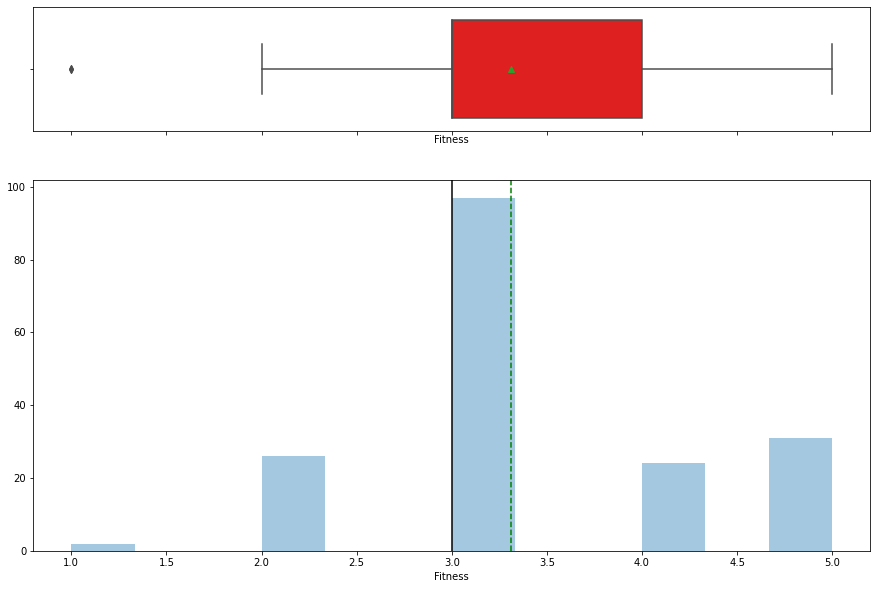

In [46]:
histogram_boxplot(cfdata.Fitness)

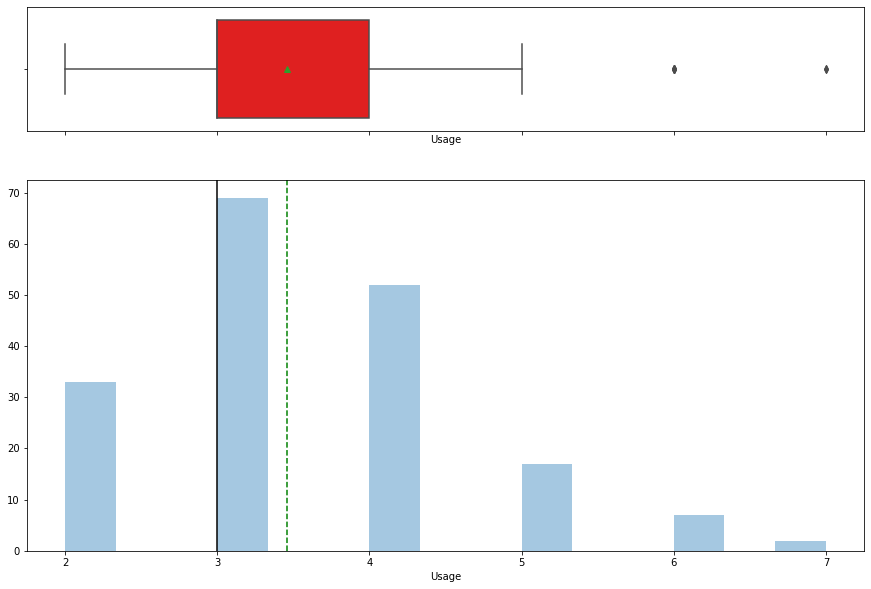

In [47]:
histogram_boxplot(cfdata.Usage)

## Observations - Usage by Customers
### The Mean Usage is 3.45 
### Usage is skewed right of the Mean 
### There are few  outliers in this variable.
### While most of the Usage is between 2 and 5 , maximum usage is up to 7 

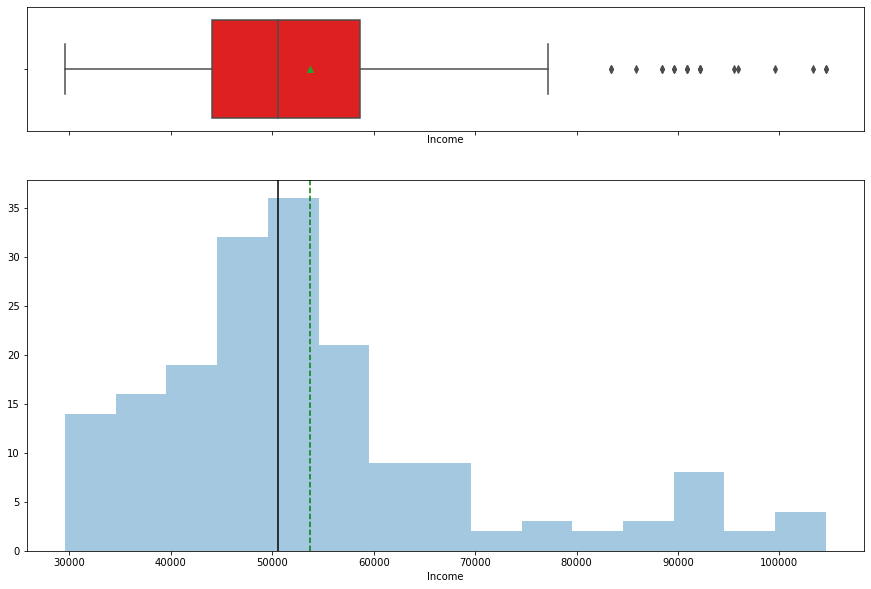

In [48]:
histogram_boxplot(cfdata.Income)

## Observations - Income Level
### The Mean Income is 53719.57 
### Usage is skewed right of the Mean 
### There are several outliers in this variable.
### While most of the Customers income level is between 30,000 & 70,000 . Observing this data maximum income level is 100,000 

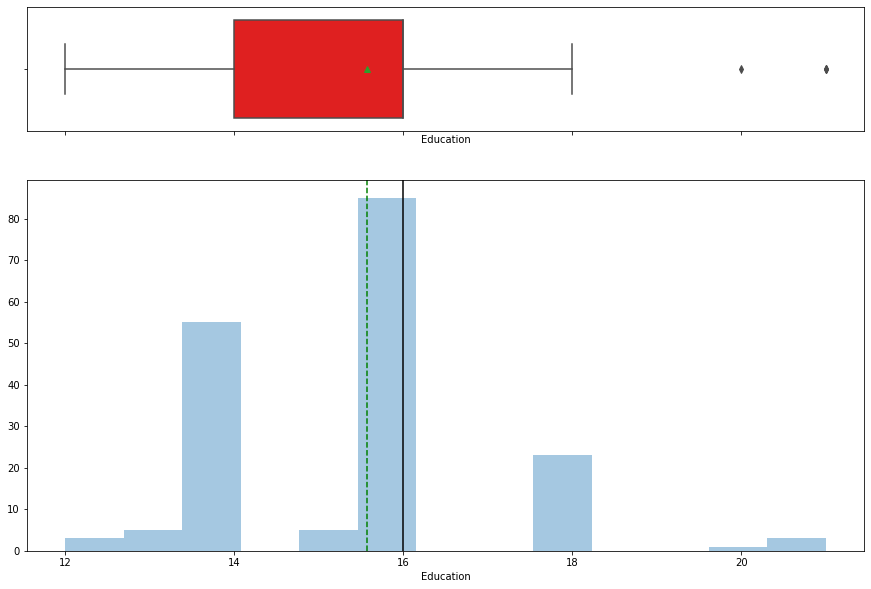

In [50]:
histogram_boxplot(cfdata.Education)

## Observations - Education level
### The Mean Education is 15.57 
### Educational level of the Customers seems to normally distributed 
### There are few  outliers in this variable.
### While on average customer have 16 years of education level. Observing this data highest education level is 20  

# Let us explore the categorical variables now

In [42]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Observations on Products

<AxesSubplot:xlabel='Product', ylabel='count'>

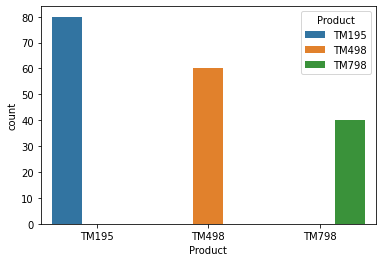

In [25]:
# Income Level vs Product 
#plt.figure(figsize=(10,7))
#ax = sns.countplot(cfdata['Product'])
#plt.xlabel('Product')
#plt.ylabel('Income')
#bar_perc(ax,cfdata['Income'])
#sns.countplot(x="Product", hue="Gender", data=cfdata)
#sns.countplot(x="Product", hue="Miles", data=cfdata)
sns.countplot(x="Product", hue="Product", data=cfdata)

### Observations on Fitness

<AxesSubplot:xlabel='Product', ylabel='count'>

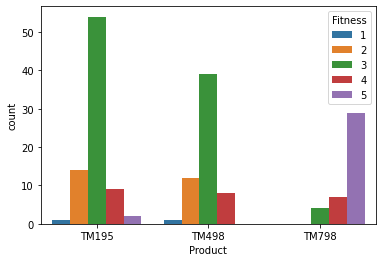

In [13]:
# Fitness Level vs Product 
#plt.figure(figsize=(10,7))
#ax = sns.countplot(cfdata['Product'])
#plt.xlabel('Product')
#plt.ylabel('Fitness')
#bar_perc(ax,cfdata['Product'])ns.countplot(x="Product", hue="Fitness", data=cfdata)
sns.countplot(x="Product", hue="Fitness", data=cfdata)

### Observations on Education


<AxesSubplot:xlabel='Education', ylabel='count'>

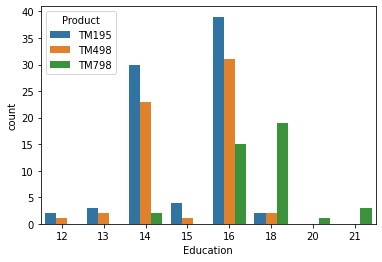

In [47]:
# Age Level vs Product 
#plt.figure(figsize=(10,7))
#ax = sns.countplot(cfdata['Product'])
#plt.xlabel('Product')
#plt.ylabel('Age')
#bar_perc(ax,cfdata['Product'])
sns.countplot(x="Education", hue="Product", data=cfdata)

### Observations on Gender

<AxesSubplot:xlabel='Product', ylabel='count'>

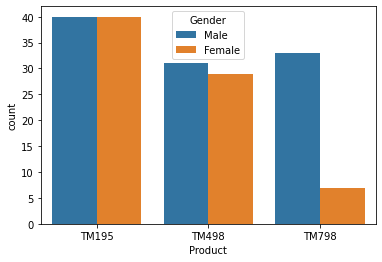

In [28]:
sns.countplot(x="Product", hue="Gender", data=cfdata)

### More Observations

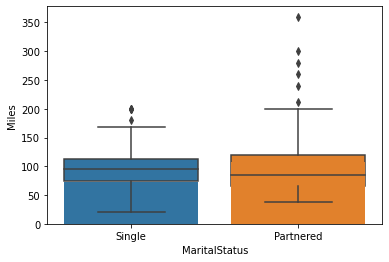

In [48]:
# Marital Status & Education 
# Marital Status Count 
#sns.countplot(x="MaritalStatus", hue="Gender", data=cfdata)
## MaritalStatus Count 
sns.countplot(x="MaritalStatus", data=cfdata)
# MaritalStatus by Product 
#sns.countplot(x="MaritalStatus", hue="Product", data=cfdata)
#sns.boxplot(data = cfdata, x='MaritalStatus', y='Miles', hue=cfdata['Gender']);
sns.boxplot(data = cfdata, x='MaritalStatus', y='Miles');


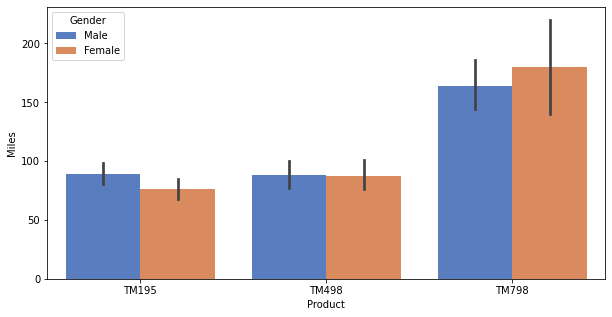

In [35]:
plt.figure(figsize=(10,5))  # setting the figure size
#ax = sns.barplot(x='Product', y='Miles', hue="MaritalStatus", data=cfdata, palette='muted')  # barplot
ax = sns.barplot(x='Product', y='Miles', hue="Gender", data=cfdata, palette='muted')  # barplot
#ax = sns.barplot(x='Income', hue="Product", data=cfdata, palette='muted')  # barplot

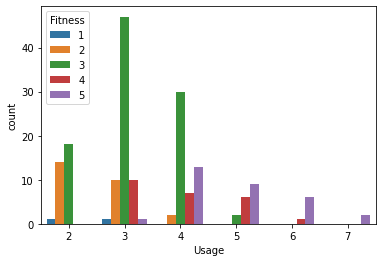

In [55]:
# Usage & Fitness 
# Usage Count 
#sns.countplot(x="Usage", hue="Product", data=cfdata)
# Fitness Count 
#sns.countplot(x="Fitness", hue="Product", data=cfdata)

#sns.countplot(x="MaritalStatus", hue="Gender", data=cfdata)
# MaritalStatus by Product 
#sns.countplot(x="MaritalStatus", hue="Product", data=cfdata)
sns.countplot(data = cfdata, x='Usage', hue=cfdata['Fitness']);
#sns.boxplot(data = cfdata, x='MaritalStatus', y='Miles');

<AxesSubplot:xlabel='Fitness', ylabel='count'>

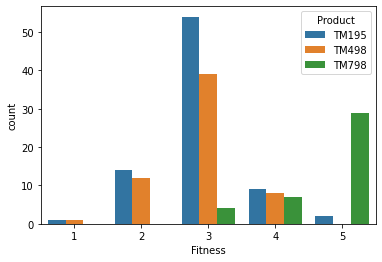

In [65]:
# Age & Miles 
# Age Count 
#sns.countplot(x="Age", hue="Product", data=cfdata)
# Fitness Count 
sns.countplot(x="Fitness", hue="Product", data=cfdata)

#sns.countplot(x="MaritalStatus", hue="Gender", data=cfdata)
# MaritalStatus by Product 
#sns.countplot(x="MaritalStatus", hue="Product", data=cfdata)
#sns.countplot(data = cfdata, x='Usage', hue=cfdata['Fitness']);
#sns.boxplot(data = cfdata, x='MaritalStatus', y='Miles');

### Corelation among numerical variables

<AxesSubplot:>

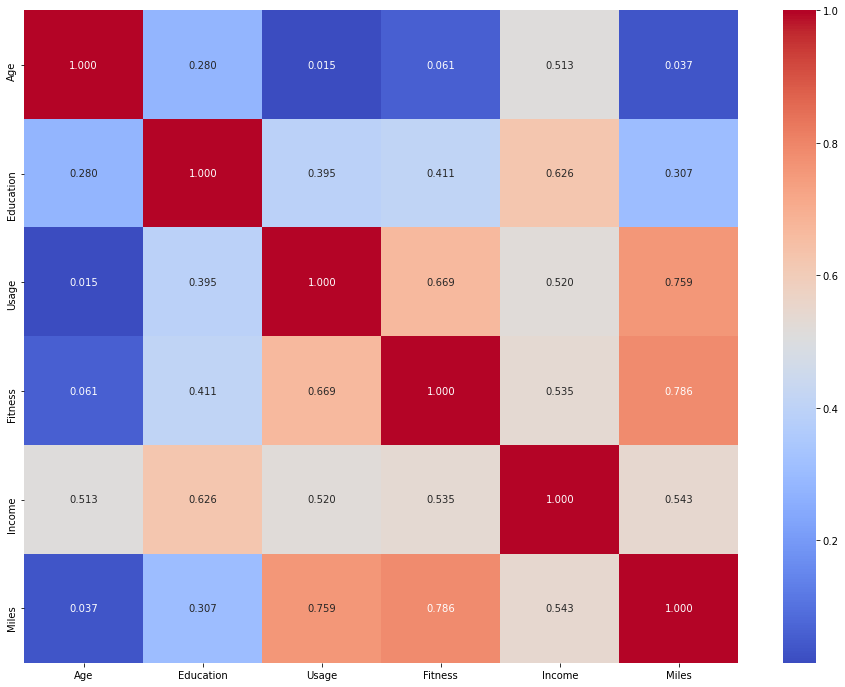

In [28]:
# Check for correlation among numerical variables
num_var = ['Age','Education','Usage','Fitness','Income','Miles']

corr = cfdata[num_var].corr()
#corr = cfdata.corr()
# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".3f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Show Correlation in numbers 

In [24]:
corr = cfdata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


### Corelation - Heatmap

<AxesSubplot:>

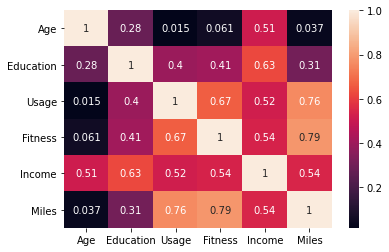

In [25]:
sns.heatmap(corr, annot=True)

#### Fitness level is highly correlated to Usage & Miles  
#### Customers who rate them high in Fitnesss Level have higher usage of the machine 
#### Also Income & Education are postive corelations. 
#### It is important to note that correlation does not imply causation.


### Bivariate Scatter Plots

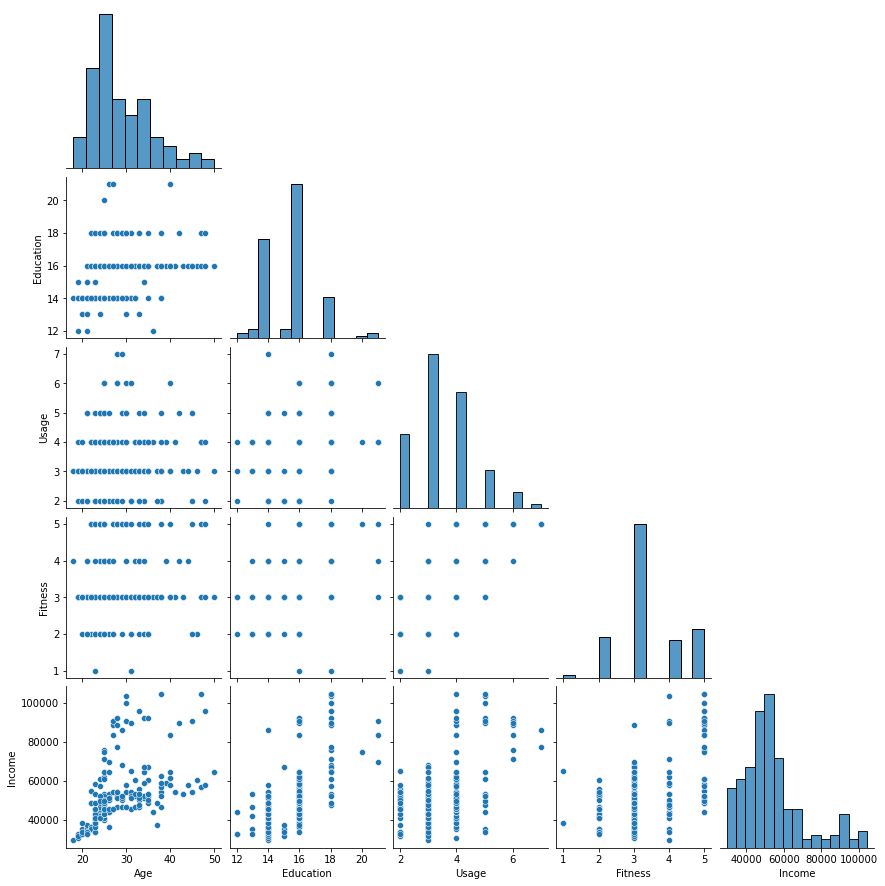

In [62]:
sns.pairplot(cfdata[num_var], corner=True)

## Multivariate Analysis

Text(0.5, 0, 'Usage')

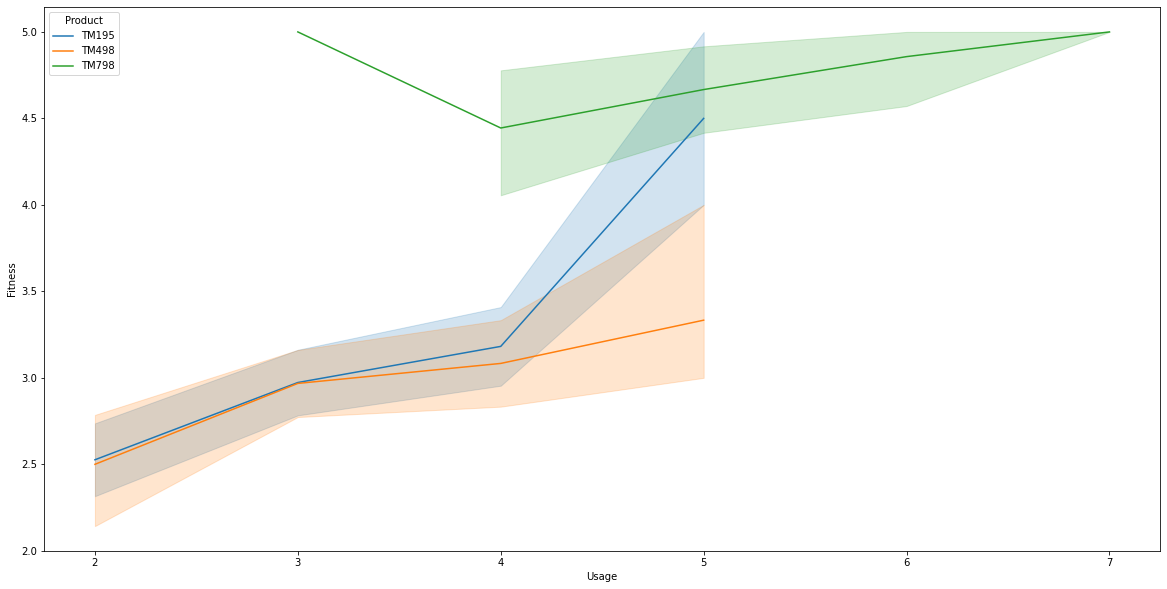

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Usage", y="Fitness", ci=95, data=cfdata, hue='Product')
plt.ylabel('Fitness')
plt.xlabel('Usage')


### Treadmill TM798 is used by customers with high Fitness level 

Text(0.5, 0, 'Income')

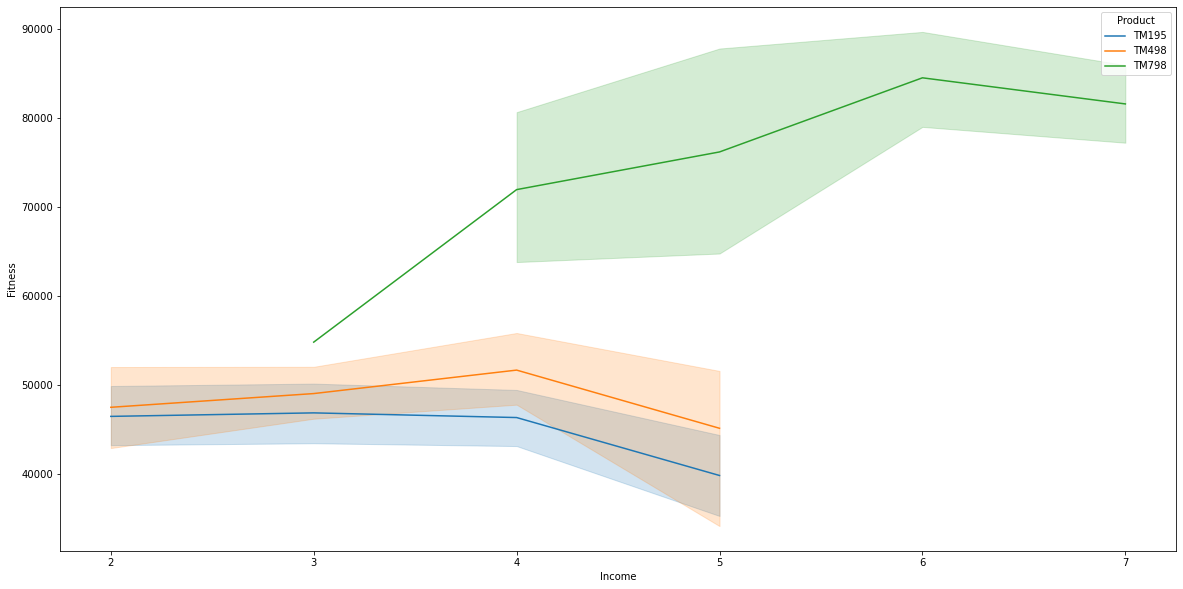

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Usage", y="Income", ci=95, data=cfdata, hue='Product')
plt.ylabel('Fitness')
plt.xlabel('Income')



### Treadmill TM798 is also preferred by customers with high Income level 

Text(0.5, 0, 'Usage')

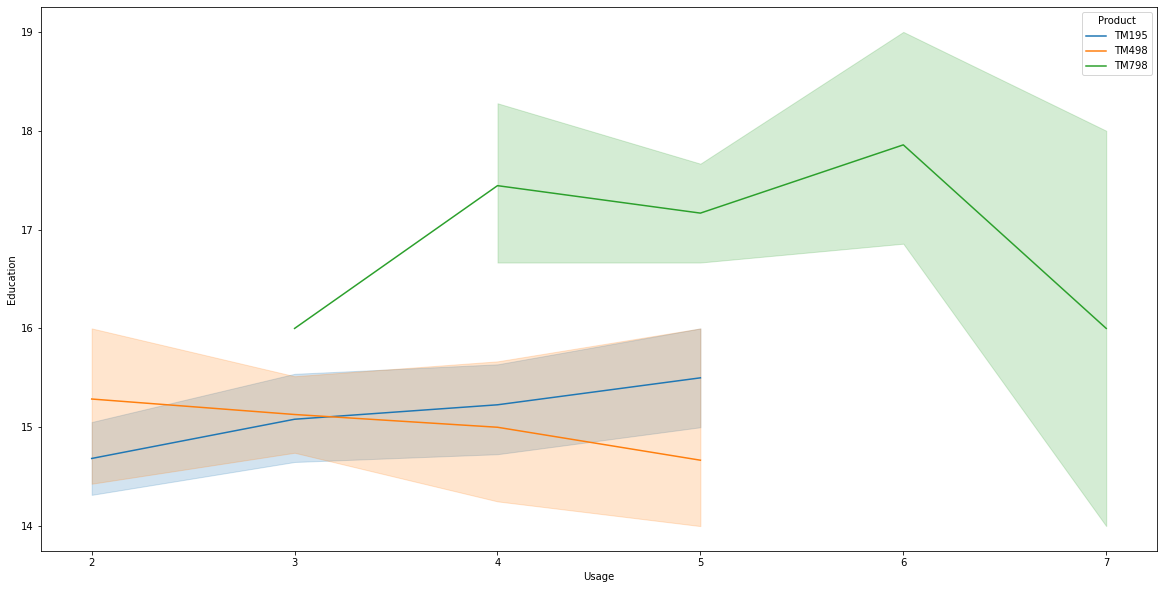

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Usage", y="Education", ci=95, data=cfdata, hue='Product')
plt.ylabel('Education')
plt.xlabel('Usage')


#### Treadmill TM798 is also preferred by customers with Higher Education 

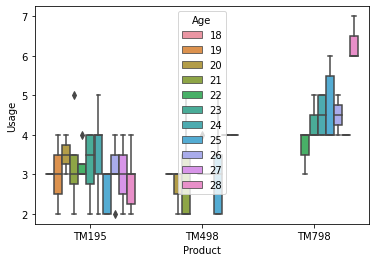

In [30]:
#sns.jointplot(cfdata['Product'], cfdata['Gender']);
#sns.barplot(cfdata['Product'], cfdata['Gender']);
#ns.histplot(cfdata.Product);
#---------------------------------------------------------------------------------------------------
# Which Product is Popular among Age  
# Create Age Groups 
#18-28
#29-39
#40-50
age=cfdata[(cfdata['Age']>=18) & (cfdata['Age']<=28)]
#print(age)
sns.boxplot(data = age, x='Product', y='Usage', hue=age['Age']);


#### Treadmill TM798 has the highest usage among Age Group 18-28

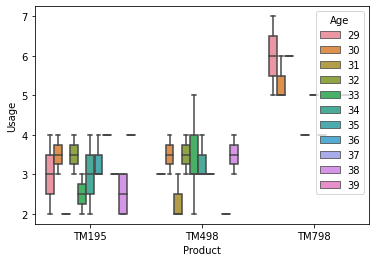

In [35]:
age=cfdata[(cfdata['Age']>=29) & (cfdata['Age']<=39)]
sns.boxplot(data = age, x='Product', y='Usage', hue=age['Age']);

#### Treadmill TM798 has the highest usage among Age Group 29-39

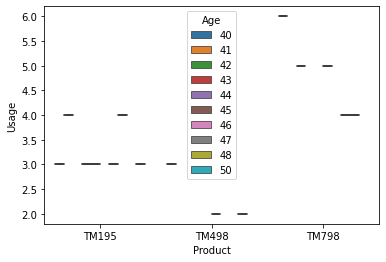

In [19]:
age=cfdata[(cfdata['Age']>=40) & (cfdata['Age']<=50)]
#print(age,cfdata['Usage'])
sns.boxplot(data = age, x='Product', y='Usage', hue=age['Age']);

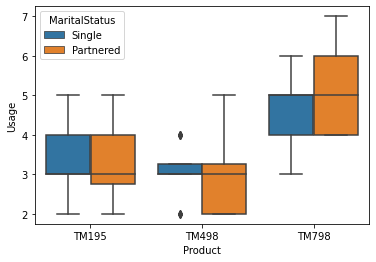

In [13]:
# Which Product is Popular among Marital Status  
sns.boxplot(data = cfdata, x='Product', y='Usage', hue=cfdata['MaritalStatus']);

#### Treadmill TM798 is also popular among Single and Partnererd Marital Status 

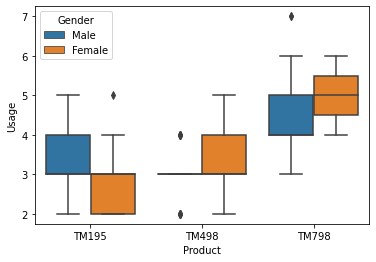

In [14]:
# Which Product is Popular among Gneder  
sns.boxplot(data = cfdata, x='Product', y='Usage', hue=cfdata['Gender']);

#### TM798 Treadmill is prefferred (used) by Females and Males 

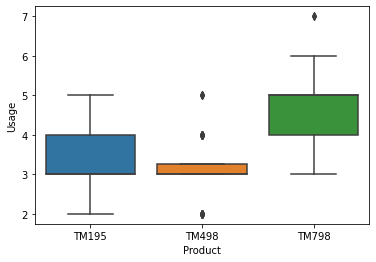

In [15]:
# Which Product has most usage  
sns.boxplot(data = cfdata, x='Product', y='Usage');

#### Most Usage is for Treadmill TM798

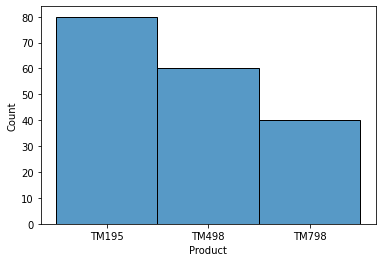

In [14]:
# histogram for looking at frequency of values in product column
sns.histplot(cfdata.Product);

#### TM195 is used by most people 

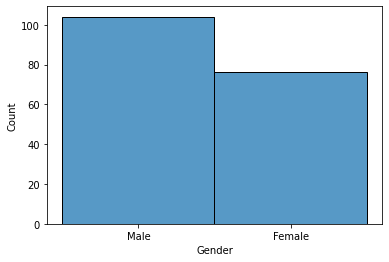

In [16]:
# histogram for looking at frequency of values in gender column
sns.histplot(cfdata.Gender);

#### More Males uses CGF products than Females

<AxesSubplot:xlabel='Age', ylabel='Count'>

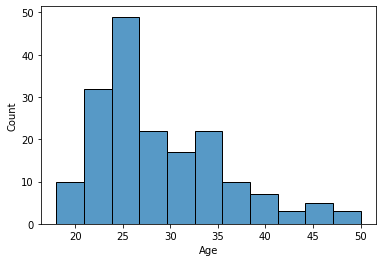

In [33]:
# histogram for looking at freaquency of values in age column
sns.histplot(cfdata['Age'])

##### Majority of the Customers are aged between higher twenties to fourties


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


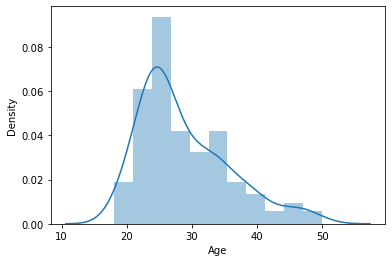

In [34]:
sns.distplot(cfdata.Age);

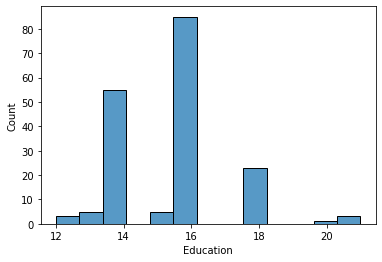

In [18]:
# histogram for looking at frequency of values in education column
sns.histplot(cfdata.Education);

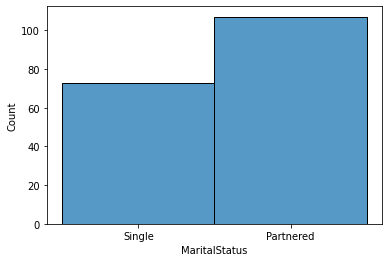

In [19]:
# histogram for looking at frequency of values in marital status column
sns.histplot(cfdata.MaritalStatus);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


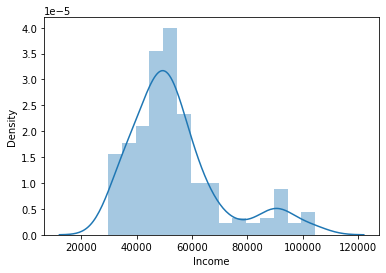

In [35]:
# histogram for looking at frequency of values in income column
#sns.histplot(cfdata.Income);
sns.distplot(cfdata.Income);

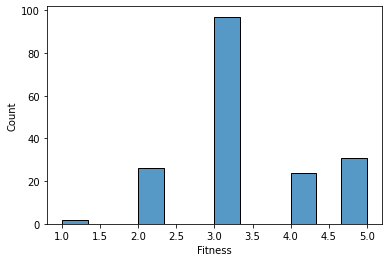

In [22]:
# histogram for looking at frequency of values in fitness column
sns.histplot(cfdata.Fitness);

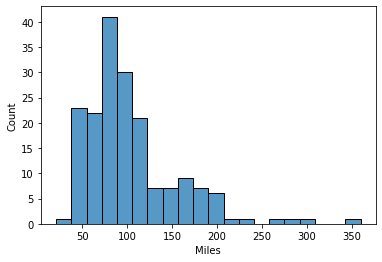

In [23]:
# histogram for looking at frequency of values in Miles column
sns.histplot(cfdata.Miles);

### Lets view Product by using Multiple Category Variables 

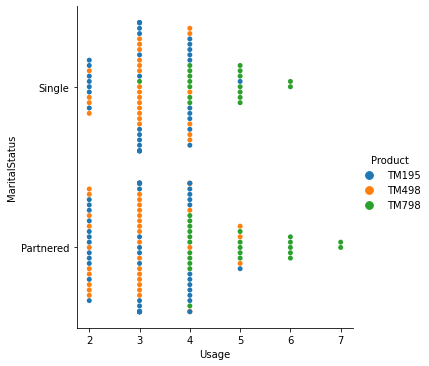

In [11]:
# Which Product has most usage in single and partnered Marital Status
# The categorical variable here is product to set hue in the graph and it has 3 variable
warnings.filterwarnings('ignore')
sns.catplot(x="Usage", y="MaritalStatus", hue="Product", kind="swarm", data=cfdata)
#sns.catplot(x="Usage", y="MaritalStatus", hue="Product", kind="strip", data=cfdata)

#### While TM195 has the least usage TM798 has the highest Usage 

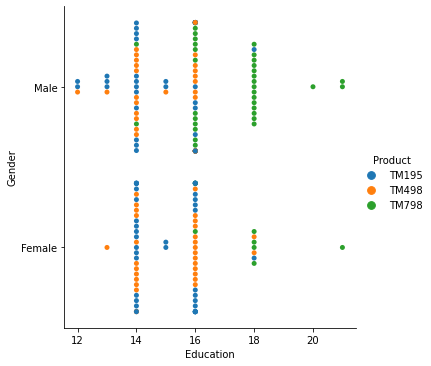

In [12]:
# User of which products are male and female and what are their education Level
# It is done with the help of category plot 
# The categorical variable here is product to set hue in the graph and it has 3 variable
warnings.filterwarnings('ignore')
sns.catplot(x="Education", y="Gender", hue="Product", kind="swarm", data=cfdata)


#### Customers with Low Education level do not use the Treadmill , TM498 is popular wth higher Education Level both Females and Males 
#### TM798 is used by 16 Year Education Level more females than Males , Higher Educated Males prefer TM798 

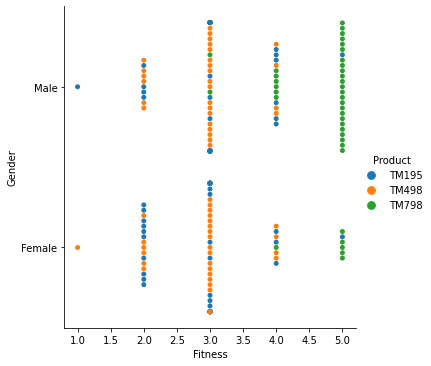

In [26]:
# User of which products are male and female and what are their level of fitness
# It is done with the help of category plot 
# The categorical variable here is product to set hue in the graph and it has 3 variable
warnings.filterwarnings('ignore')
sns.catplot(x="Fitness", y="Gender", hue="Product", kind="swarm", data=cfdata)

#### Customers who rate high in Fitness Level are using TM798 , More males fall in this category than females

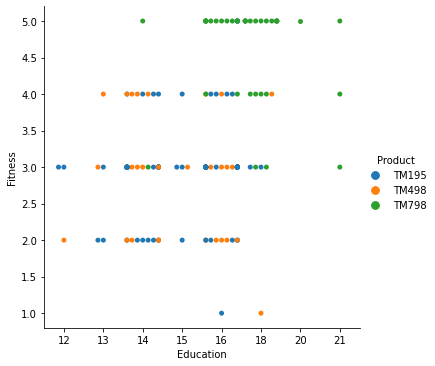

In [27]:
# What are the education and fitness level of user of each product
# It is done with the help of category plot 
# The categorical variable here is product to set hue in the graph and it has 3 variable
warnings.filterwarnings('ignore')
sns.catplot(x="Education", y="Fitness", hue="Product", kind="swarm", data=cfdata)

## Conclusion and Recommendations
### Conclusion
We analysed a dataset of 180 Customers of Cardio Good Fitness company. The data included three Treadmill products:TM195, TM498 & TM79. The data revolves around customer profiles for the three different machines. From the data it shows that there are more customers of TM195 (80), midlevel is TM498(60) and TM798 (40) has the lowest number of customers. While TM195 was bought by more customers the data showed that the usage of this Treadmill is lot lower as compared to TM498 & TM798. Thus we determined that the factors such as Usage, Income Level, and Fitness level by customers of Treadmill Products TM498 and TM798 would make it easier to focus on increasing sales for these two products.

### Recommendation

#### TM798 commands the highest usage by the purchasers of this Treadmill.
#### TM798 Buyers have the highest Income Level
#### TM798 Buyers are Educated, hence easier to convince to buy the treadmill
#### TM798 has the lowest sales (40) yet has the highest usage by its buyers
#### Average Income of TM798 buyer is 29,023.55 higher than the average income of buyer of TM195 buyers, so there is more buying power among this group
#### TM798 Buyesrs Average Fitness level is 4.62 as compared to 2.96 for TM195 Buyers, so there is a serious committment level to use the Treadmill
#### From the above informations it appears that the buyers of TM798 are serious in using the Treadmill and will be easier to market to this Group to increase sales of TM798
